In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10

In [0]:
#Reading the data
data=pd.read_csv('/content/drive/My Drive/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [4]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
#Dropping the columns Sno and Last Update
data.drop(['SNo','Last Update'],axis=1,inplace=True)

In [0]:
#Getting additonal Active cases for better implementation and information
data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [7]:
#Checking for NA values
data.isna().sum()

ObservationDate       0
Province/State     4433
Country/Region        0
Confirmed             0
Deaths                0
Recovered             0
Active                0
dtype: int64

In [8]:
#Filling NA Values
data['Province/State']=data['Province/State'].fillna('Not Specified')
data.isna().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64

In [9]:
data['Province/State'].value_counts()

Not Specified                   4433
Diamond Princess cruise ship      82
Gansu                             69
Hebei                             69
Liaoning                          67
                                ... 
Jefferson County, KY               1
Cherokee County, GA                1
External territories               1
Norwell County, MA                 1
Queens County, NY                  1
Name: Province/State, Length: 294, dtype: int64

In [10]:
data.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Confirmed          float64
Deaths             float64
Recovered          float64
Active             float64
dtype: object

In [11]:
data

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9730,03/28/2020,Wyoming,US,82.0,0.0,0.0,82.0
9731,03/28/2020,Xinjiang,Mainland China,76.0,3.0,73.0,0.0
9732,03/28/2020,Yukon,Canada,4.0,0.0,0.0,4.0
9733,03/28/2020,Yunnan,Mainland China,180.0,2.0,172.0,6.0


In [12]:
ft=data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index(drop=True)
ft

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,03/28/2020,Not Specified,Afghanistan,110.0,4.0,2.0,104.0
1,03/28/2020,Not Specified,Albania,197.0,10.0,31.0,156.0
2,03/28/2020,Not Specified,Algeria,454.0,29.0,31.0,394.0
3,03/28/2020,Not Specified,Andorra,308.0,3.0,1.0,304.0
4,03/28/2020,Not Specified,Angola,5.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...
306,03/28/2020,Wyoming,US,82.0,0.0,0.0,82.0
307,03/28/2020,Xinjiang,Mainland China,76.0,3.0,73.0,0.0
308,03/28/2020,Yukon,Canada,4.0,0.0,0.0,4.0
309,03/28/2020,Yunnan,Mainland China,180.0,2.0,172.0,6.0


In [13]:
full_latest_grouped = ft.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,110.0,4.0,2.0,104.0
1,Albania,197.0,10.0,31.0,156.0
2,Algeria,454.0,29.0,31.0,394.0
3,Andorra,308.0,3.0,1.0,304.0
4,Angola,5.0,0.0,0.0,5.0
...,...,...,...,...,...
174,Venezuela,119.0,2.0,39.0,78.0
175,Vietnam,174.0,0.0,21.0,153.0
176,West Bank and Gaza,98.0,1.0,18.0,79.0
177,Zambia,28.0,0.0,0.0,28.0


In [14]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
temp_f

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,121478.0,2026.0,1072.0,118380.0
1,Italy,92472.0,10023.0,12384.0,70065.0
2,Mainland China,81401.0,3295.0,74978.0,3128.0
3,Spain,73235.0,5982.0,12285.0,54968.0
4,Germany,57695.0,433.0,8481.0,48781.0
...,...,...,...,...,...
174,MS Zaandam,2.0,0.0,0.0,2.0
175,Saint Kitts and Nevis,2.0,0.0,0.0,2.0
176,Papua New Guinea,1.0,0.0,0.0,1.0
177,Timor-Leste,1.0,0.0,0.0,1.0


In [15]:
temp_f = temp_f[['Country/Region', 'Confirmed', 'Active', 'Deaths', 'Recovered']].reset_index(drop=True)
temp_f

,Country/Region,Confirmed,Active,Deaths,Recovered
0,US,121478.0,118380.0,2026.0,1072.0
1,Italy,92472.0,70065.0,10023.0,12384.0
2,Mainland China,81401.0,3128.0,3295.0,74978.0
3,Spain,73235.0,54968.0,5982.0,12285.0
4,Germany,57695.0,48781.0,433.0,8481.0
...,...,...,...,...,...
174,MS Zaandam,2.0,2.0,0.0,0.0
175,Saint Kitts and Nevis,2.0,2.0,0.0,0.0
176,Papua New Guinea,1.0,1.0,0.0,0.0
177,Timor-Leste,1.0,1.0,0.0,0.0


In [16]:
from IPython.display import display, HTML
display(HTML(temp_f.to_html()))

,Country/Region,Confirmed,Active,Deaths,Recovered
0,US,121478.0,118380.0,2026.0,1072.0
1,Italy,92472.0,70065.0,10023.0,12384.0
2,Mainland China,81401.0,3128.0,3295.0,74978.0
3,Spain,73235.0,54968.0,5982.0,12285.0
4,Germany,57695.0,48781.0,433.0,8481.0
5,France,38105.0,30064.0,2317.0,5724.0
6,Iran,35408.0,21212.0,2517.0,11679.0
7,UK,17312.0,16140.0,1021.0,151.0
8,Switzerland,14076.0,12282.0,264.0,1530.0
9,Netherlands,9819.0,9173.0,640.0,6.0


In [0]:
confirmed=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Confirmed Data.csv')
recovered=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Recovered Data.csv')
deaths=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Deaths Data.csv')
active=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Active Data.csv')

In [0]:
df=[confirmed,recovered,deaths,active]

In [0]:
from functools import reduce
main = reduce(lambda  left,right: pd.merge(left,right,on=['date'],how='outer'), df)

In [20]:
main

,date,confirmed_val,recovered_val,deaths_val,active_val
0,2020-03-28,4.792203e+05,50050.523381,21938.878461,4.370171e+05
1,2020-03-29,4.771427e+05,48981.160875,21657.053385,4.497893e+05
2,2020-03-30,4.859697e+05,48983.693732,21921.581816,4.678472e+05
3,2020-03-31,5.027110e+05,50484.726495,22641.986068,4.883740e+05
4,2020-04-01,5.316508e+05,53610.209116,23983.479342,5.173452e+05
5,2020-04-02,5.646014e+05,57120.152891,25505.826408,5.488973e+05
6,2020-04-03,5.971446e+05,60503.837272,27034.569871,5.820736e+05
7,2020-04-04,6.234679e+05,63228.513444,28230.741267,6.127123e+05
8,2020-04-05,6.293077e+05,63261.444921,28342.024201,6.293928e+05
9,2020-04-06,6.499583e+05,64958.322118,29215.907451,6.527902e+05


In [0]:
main=main.set_index(['date'])

Text(0, 0.5, 'Number of cases')

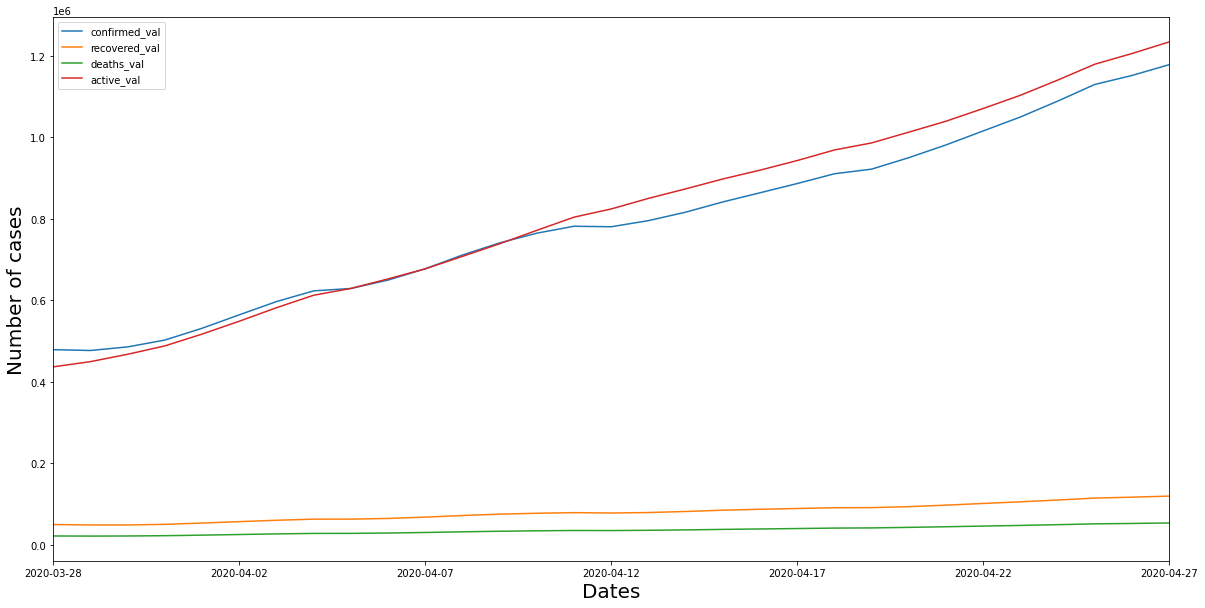

In [24]:
main.plot(kind='line',figsize=(20,10))
plt.legend(loc='best')
plt.xlabel('Dates',size=20)
plt.ylabel('Number of cases',size=20)